# Program for Figure 3B, C and F

This program is used for Figure 3B, C and F.

### import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
import scipy.stats as stat

### Matplotlib setting

In [2]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.size"] = 16.0

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

### calculate the proportion of resistance-gene-deleted cell lineages (Figure3B) or growth-restored cell lineages (Figure3C).

standard errors are calculated from binomial distribution.  
The number of resistance-gene-deleted cell lineages and growth-restored cell lineages are written in "number_of_each_type_of_cells.csv"

In [3]:
x1 = [1, 2, 3, 4, 5]
x2 = [1, 2, 3, 4, 5, 6]
x3 = [2, 3, 4, 5]
x4 = [2, 3, 4, 5, 6]

y1 = [343/1399, 261/1081, 201/718,196/796, 216/862] ### fraction of resistance-gene-deleted cell lineages among all cell lineages
y2 = [97/260, 93/245, 78/174, 34/184, 0/195, 0/358] ### fraction of growth-restored cell lineages among all resistance-gene-deleted cell lineages
y3 = [((343/1399 * (1 - 343/1399))/1399)**(1/2),((261/1081 * (1 - 261/1081))/1081)**(1/2),((201/718 * (1 - 201/718))/718)**(1/2),\
      ((196/796 * (1 - 196/796))/796)**(1/2),((216/862 * (1 - 216/862))/862)**(1/2)] ###calculate the standard error 
y4 = [((97/260 * (1 - 97/260))/260)**(1/2),((93/245 * (1 - 93/245))/245)**(1/2),((78/174 * (1 - 78/174))/174)**(1/2),\
      ((34/184 * (1 - 34/184))/184)**(1/2),0,0]  ###calculate the standard error 

### plot barplots and save figure.

(top) Figure 3B. (bottom) Figure 3C.

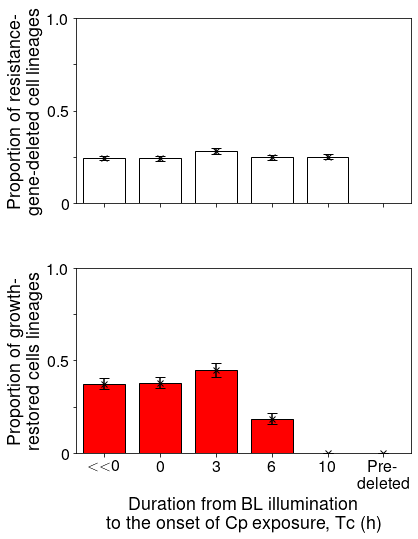

In [4]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(6,8))
fig.subplots_adjust(hspace=0.35, wspace=0.2)

plt.setp(ax[1], xticks=[1, 2, 3, 4, 5, 6], xticklabels=['$<<$0', '0', '3', '6', '10','Pre-\ndeleted'])
plt.setp(ax[0], xticks=[1, 2, 3, 4, 5, 6], xticklabels=['','','','','',''])
plt.setp(ax, yticks=[0, 0.25, 0.5, 0.75, 1.0], yticklabels=['0', '', '0.5', '', '1.0'])

ax[0].plot(x1,y1,'x',color='black', lw = 2, label=None)
ax[0].bar(x1,y1, yerr = y3, color='white',edgecolor='black',label='Deletion fraction',width=0.75, capsize = 5)
ax[0].set_ylabel('Proportion of resistance-\ngene-deleted cell lineages',fontsize = 18)
ax[0].set_xlim(0.5,6.5)
ax[0].set_ylim(0,1)

ax[1].plot(x2,y2, 'x', color='black', lw = 2, label=None)
ax[1].bar(x2,y2,yerr = y4, color='red',edgecolor='black',label='Survival Cell fraction among deletion cells',width=0.75, capsize = 5)
ax[1].set_ylabel('Proportion of growth-\nrestored cells lineages',fontsize = 18)
ax[1].set_xlabel('Duration from BL illumination\nto the onset of Cp exposure, Tc (h)',fontsize = 18)
ax[1].set_xlim(0.5,6.5)
ax[1].set_ylim(0,1)

plt.show()
#save_path = './Figure3B_C.pdf'
#plt.savefig(save_path, transparent = True, bbox_inches = 'tight')

## Figure 3F

### import data

These data are the fluorescence intensities of mCherry-CAT at Cp exposure.

In [5]:
Total0 = pd.read_csv('./deletion_fraction_data/Total/Total_0Hr.csv')
Total3 = pd.read_csv('./deletion_fraction_data/Total/Total_3Hr.csv')
Total6 = pd.read_csv('./deletion_fraction_data/Total/Total_6Hr.csv')
Total10= pd.read_csv('./deletion_fraction_data/Total/Total_10Hr.csv')
Total10m=pd.read_csv('./deletion_fraction_data/Total/Total_Predel.csv')

### divide and integrate the data

Data are divided into two groups (top 50%/bottom 50% of fluorescence intensities) in each Tc.

In [6]:
Total_b_50 = []
Total_b_50 += [Total0[Total0['MeanTxRed'] < Total0['MeanTxRed'].median()]]
Total_b_50 += [Total3[Total3['MeanTxRed'] < Total3['MeanTxRed'].median()]]
Total_b_50 += [Total6[Total6['MeanTxRed'] < Total6['MeanTxRed'].median()]]
Total_b_50 += [Total10[Total10['MeanTxRed'] < Total10['MeanTxRed'].median()]]
Total_b_50 += [Total10m[Total10m['MeanTxRed'] < Total10m['MeanTxRed'].median()]]
Total_t_50 = []
Total_t_50 += [Total0[Total0['MeanTxRed'] >= Total0['MeanTxRed'].median()]]
Total_t_50 += [Total3[Total3['MeanTxRed'] >= Total3['MeanTxRed'].median()]]
Total_t_50 += [Total6[Total6['MeanTxRed'] >= Total6['MeanTxRed'].median()]]
Total_t_50 += [Total10[Total10['MeanTxRed'] >= Total10['MeanTxRed'].median()]]
Total_t_50 += [Total10m[Total10m['MeanTxRed'] >= Total10m['MeanTxRed'].median()]]

### Calculate and save data

Calculate the proportions of growth-restored resistance-gene-deleted cell lineages ('Probability') and the standard errors ('yerrorbars').  
If indent is deleted, Total_data is saved.

In [7]:
Total_data = pd.DataFrame({'Time':[],'Probability':[],'mCherry-CAT':[],'MeanTxRed':[],'count':[]})
for i in np.arange(0,len(Total_b_50),1):
    b_data = Total_b_50[i]
    b_data_mean = b_data.loc[:,['Time','Dividing','MeanTxRed']].mean().rename({'Dividing':'Probability'})
    b_data_mean['count'] = len(b_data)
    b_data_mean['mCherry-CAT'] = 'bottom 50\%'
    Total_data = pd.concat([Total_data, pd.DataFrame([b_data_mean])])
    
for i in np.arange(0,len(Total_t_50),1):
    t_data = Total_t_50[i]
    t_data_mean = t_data.loc[:,['Time','Dividing','MeanTxRed']].mean().rename({'Dividing':'Probability'})
    t_data_mean['count'] = len(t_data)
    t_data_mean['mCherry-CAT'] = 'top 50\%'
    Total_data = pd.concat([Total_data, pd.DataFrame([t_data_mean])])
Total_data = Total_data.sort_values('Time')
Total_data['Time'] =Total_data['Time'].astype('int') .astype('str') 
Total_data.loc[Total_data['Time'] == '20','Time'] = 'Pre-\ndeleted'
Total_data['yerrorbars'] = np.sqrt(Total_data['Probability']*(1-Total_data['Probability'])/Total_data['count'])
#Total_data.to_csv('./deletion_fraction_data/Figure3_F_data.csv')

### calculated p-value

p-values between top 50% groups and bottom 50% groups in each Tc.
p-value are calculated by proportional z-test.

In [8]:
q0 = Total_t_50[0].Dividing.sum()/len(Total_t_50[0].Dividing) - Total_b_50[0].Dividing.sum()/len(Total_b_50[0].Dividing)
p0 = (Total_t_50[0].Dividing.sum()+ Total_b_50[0].Dividing.sum())/(len(Total_t_50[0].Dividing)+len(Total_b_50[0].Dividing))
pvalue0 = stat.norm.cdf(q0/np.sqrt(p0*(1-p0)*(1/len(Total_t_50[0].Dividing)+1/len(Total_b_50[0].Dividing))))*2
q3 = Total_t_50[1].Dividing.sum()/len(Total_t_50[1].Dividing) - Total_b_50[1].Dividing.sum()/len(Total_b_50[1].Dividing)
p3 = (Total_t_50[1].Dividing.sum()+ Total_b_50[1].Dividing.sum())/(len(Total_t_50[1].Dividing)+len(Total_b_50[1].Dividing))
pvalue3 = stat.norm.cdf(q3/np.sqrt(p3*(1-p3)*(1/len(Total_t_50[1].Dividing)+1/len(Total_b_50[1].Dividing))))*2
q6 = Total_t_50[2].Dividing.sum()/len(Total_t_50[2].Dividing) - Total_b_50[2].Dividing.sum()/len(Total_b_50[2].Dividing)
p6 = (Total_t_50[2].Dividing.sum()+ Total_b_50[2].Dividing.sum())/(len(Total_t_50[2].Dividing)+len(Total_b_50[2].Dividing))
pvalue6 = stat.norm.cdf(-q6/np.sqrt(p6*(1-p6)*(1/len(Total_t_50[2].Dividing)+1/len(Total_b_50[2].Dividing))))*2

pvalue_list = [pvalue0,pvalue3,pvalue6]
time_list = [0,3,6]
for i in np.arange(0,3,1):
    print('At Tc = {}, p-value is {:3f}'.format(time_list[i],pvalue_list[i]))

At Tc = 0, p-value is 0.855878
At Tc = 3, p-value is 0.280793
At Tc = 6, p-value is 0.008576


### set variables for plotting.

In [9]:
x1 = [0.2,1.2,2.2,3.2,4.2]
x2 = [-0.2, 0.8,1.8,2.8,3.8]

center_list = [0.5,0.65,0.45]
height_list = [0.475,0.625,0.425]
width_list = [0.02,0.02,0.02]

### plot and save figure.

"n.s." represents p-value is higher than significant level, 0.01.  
Astarisk represents p-value is lower than significant level, 0.01.   

<Figure size 648x1152 with 0 Axes>

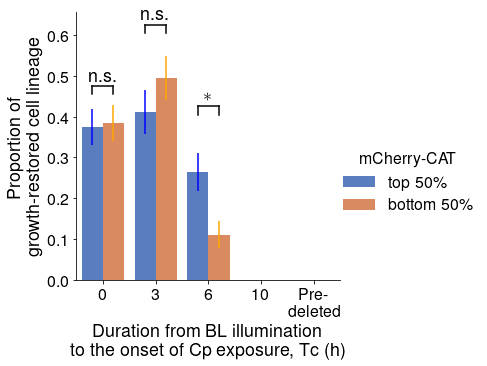

In [10]:
### plot barplots and their errorbars.
plt.figure(figsize = (9,16))
sns.catplot(x='Time',y='Probability',hue='mCherry-CAT',hue_order=['top 50\%', 'bottom 50\%'],data=Total_data,palette="muted",order=['0','3','6','10','Pre-\ndeleted'], kind='bar')
plt.errorbar(x1,Total_data[Total_data['mCherry-CAT']=='bottom 50\%']['Probability'],yerr=Total_data[Total_data['mCherry-CAT']=='bottom 50\%']['yerrorbars'],color = 'orange',ls='')
plt.errorbar(x2,Total_data[Total_data['mCherry-CAT']=='top 50\%']['Probability'],yerr=Total_data[Total_data['mCherry-CAT']=='top 50\%']['yerrorbars'],color = 'blue',ls='')

### plot significance pair.
for k, pvalue in enumerate(pvalue_list):
    if pvalue > 0.01:
        plt.text(k,center_list[k],'n.s.',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    elif pvalue > 0.001:
        plt.text(k,center_list[k],r'$\ast$',fontsize = 18, horizontalalignment='center', verticalalignment='center')
    plt.plot((k-1/5,k+1/5),(height_list[k],height_list[k]), color = 'black')
    plt.plot((k-1/5,k-1/5),(height_list[k],height_list[k]-width_list[k]), color = 'black')
    plt.plot((k+1/5,k+1/5),(height_list[k],height_list[k]-width_list[k]), color = 'black')

### plot x-yticks and save figure (if deleting indentation.)
plt.xlim(-0.5,4.5)
plt.xlabel('Duration from BL illumination\nto the onset of Cp exposure, Tc (h)', fontsize = 18)
plt.ylabel('Proportion of\ngrowth-restored cell lineage', fontsize = 18)
plt.show()
#plt.savefig('./Figure3F.pdf', transparent = True, bbox_inches ='tight')